# KAGRA PRX with Mirror maps

In [74]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [17]:
import pykat
from pykat import finesse

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline
pykat.init_pykat_plotting(dpi=90)

In [18]:
base = finesse.kat()
base.verbose=False
base.parse("""
# clight 299792458.0 

l i1 83.74 0  nL                  #I0=780W
const fmod1 16.880962M            #f1
const fmod2 45.0159M              #f2
const fmod3 56.2699M              #f3

mod eo1 $fmod1 0.1 1 pm 0 nL neo1
s seo1 0 neo1 neo2
mod eo2 $fmod2 0.1 1 pm 0 neo2 neo3
s seo2 0 neo3 neo4
mod eo3 $fmod3 0.05 1 am 0 neo4 neo5

s eo1refl 0 neo5 neo22
bs refl 0.0001 0.9999 0 45 neo22 dump npr nREFL   #REFL
s bsm 0 npr nprb
m prm 0.90 0.10 -13 nprb nf0
s Lp1 14.7615 nf0 nf1 #14.7615 
bs PR2 1 0 0 0.6860 nf1 nf2 dump dump # tilted
s Lp2 11.0661 nf2 nf3
bs PR3 1 0 0 0.6860 nf3 nf4 dump dump # tilted
s Lp3 15.7638 nf4 n1

bs bs1 0.5 0.5 0 45 n1 n2 n3hr n4hr   #BS
s bs1bsAR1 0 n3hr n3hr2
m bsAR1 0 1 0 n3hr2 n3ar
s subBS1 0.0 1.45 n3ar n3ar2 # BS thickness is ignored 
m bsAR3 0 1 0 n3ar2 n3
s bs1bsAR2 0 n4hr n4hr2
m bsAR2 0 1 0 n4hr2 n4ar
s subBS2 0.0 1.45 n4ar n4ar2 # BS thickness is ignored 
m bsAR4 0 1 0 n4ar2 n4

s Lmx 26.6649  n3 n6
s Lmy 23.3351  n2 n5

bs ARx 200e-6 0.9998 0 0.025 n6 nPOX n6ar dump   # wedged ITM
bs ARy 200e-6 0.9998 0 0.025 n5 dump n5ar dump   # wedged ITM

s subx 0.15 1.754 n6ar n6hr  # thickness 150mm
s suby 0.15 1.754 n5ar n5hr  # thickness 150mm

m ITMx 0.996 4000e-6 90 n6hr dump
#m ITMy 0.996 4000e-6 0 n5hr dump
m ITMy 0.996 0e-6 0 n5hr dump


attr ITMx Rc -1900 % no error
attr ITMy Rc -1900 % no error
attr ARx Rc 0
attr ARy Rc 0
attr prm Rc -458.1285
attr PR2 Rc -3.0764
attr PR3 Rc 24.9165
""")

## Field Checks

### Fields in PRC - Sideband Lock

<function matplotlib.pyplot.show>

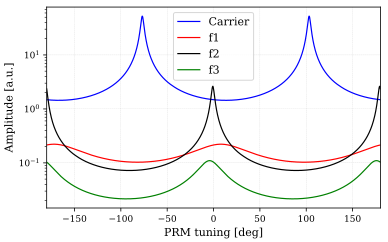

In [19]:
kat0 = base.deepcopy()
kat0.parse("""
ad CRPRC 0 nf0
ad f1PRC 16.880962M nf0
ad f2PRC 45.0159M   nf0
ad f3PRC 56.2699M   nf0
xaxis* prm phi lin -180 180 1000

cav prcN prm nf0 ITMx n6hr
cav prcS prm nf0 ITMy n5hr

maxtem 4
phase 2
""")

out = kat0.run()
plt.semilogy(out.x, out["CRPRC"],label="Carrier")
plt.semilogy(out.x, out["f1PRC"],label="f1")
plt.semilogy(out.x, out["f2PRC"],label="f2")
plt.semilogy(out.x, out["f3PRC"],label="f3")
plt.xlabel("PRM tuning [deg]")
plt.ylabel("Amplitude [a.u.]")
plt.legend(loc=0)
plt.show

### With Mirror Map

In [ ]:
## Cavity scan with all ITM mirror maps 

kat0 = base.deepcopy()
kat0.prm.remove()
kat0.parse("""
## -45 deg is a tuning for SB lock
m prm 0.90 0.10 -45 nprb nf0

ad CRPRC 0 nf0
ad f1PRC 16.880962M nf0
ad f2PRC 45.0159M   nf0
ad f3PRC 56.2699M   nf0
xaxis* prm phi lin -180 180 100

map ITMy ITMYhr.txt
map ITMx ITMXhr.txt
map ARx ITMXsub.txt
map ARx ITMXsub.txt
map ITMx Apperture.txt
map ITMy Apperture.txt

maxtem 8
phase 2
""")

out = kat0.run()
plt.semilogy(out.x, out["CRPRC"],label="Carrier")
plt.semilogy(out.x, out["f1PRC"],label="f1")
plt.semilogy(out.x, out["f2PRC"],label="f2")
plt.semilogy(out.x, out["f3PRC"],label="f3")
plt.xlabel("PRM tuning [deg]")
plt.ylabel("Amplitude [a.u.]")
plt.legend(loc=0)
plt.show

<function matplotlib.pyplot.show>

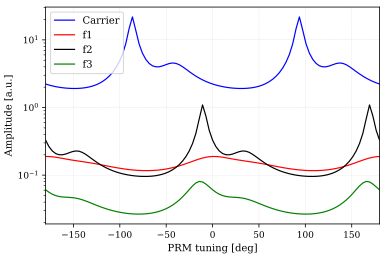

In [11]:
## Cavity scan with only ITM Reflection phase mirror maps 

katp = base.deepcopy()
katp.prm.remove()
katp.parse("""
## -45 deg is a tuning for SB lock
m prm 0.90 0.10 -45 nprb nf0

ad CRPRC 0 nf0
ad f1PRC 16.880962M nf0
ad f2PRC 45.0159M   nf0
ad f3PRC 56.2699M   nf0
xaxis* prm phi lin -180 180 100

map ITMy ITMYhr.txt
map ITMx ITMXhr.txt
map ITMx Apperture.txt
map ITMy Apperture.txt

maxtem 6
phase 2
""")

out = katp.run()
plt.semilogy(out.x, out["CRPRC"],label="Carrier")
plt.semilogy(out.x, out["f1PRC"],label="f1")
plt.semilogy(out.x, out["f2PRC"],label="f2")
plt.semilogy(out.x, out["f3PRC"],label="f3")
plt.xlabel("PRM tuning [deg]")
plt.ylabel("Amplitude [a.u.]")
plt.legend(loc=0)
plt.show

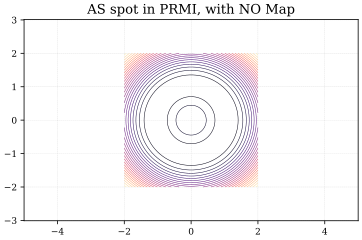

<Figure size 540x333.72 with 0 Axes>

In [79]:
## AS spot without mirror maps

kat1 = base.deepcopy()
kat1.parse("""
beam beam n4 # AS port
gauss input i1 nL 4.4088792e-3 7.3067531
xaxis beam x lin -2 2 300
x2axis beam y lin -2 2 300

maxtem 8
phase 2
""")

beamprof = kat1.run()

fig = plt.figure()
fig = plt.contour(beamprof.x, beamprof.y, beamprof["beam"], 25, linewidths=0.5)
plt.axis("equal")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.title('AS spot in PRMI, with NO Map')
plt.show()


In [80]:
## AS spot with both AR and HR mirror maps of ITMs

kat2 = base.deepcopy()
kat2.parse("""

map ITMx ITMXhr.txt
map ARx ITMXsub.txt
map ITMx Apperture.txt

map ITMy ITMYhr.txt
map ARy ITMYsub.txt
map ITMy Apperture.txt

beam beam n4 # AS port
gauss input i1 nL 4.4088792e-3 7.3067531
xaxis beam x lin -2 2 300
x2axis beam y lin -2 2 300
maxtem 8
phase 2
""")
beam_mapall = kat2.run()

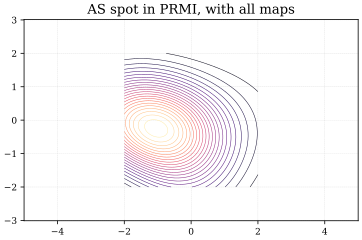

<Figure size 540x333.72 with 0 Axes>

In [81]:
fig = plt.figure()
fig = plt.contour(beam_mapall.x, beam_mapall.y, beam_mapall["beam"], 25, linewidths=0.5)
plt.axis("equal")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.title('AS spot in PRMI, with all maps')

plt.show()
plt.savefig('AS_all_map.png')

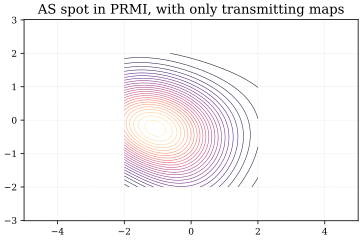

<Figure size 540x333.72 with 0 Axes>

In [82]:
kat3 = base.deepcopy()
kat3.parse("""

map ARx ITMXsub.txt
map ARx Apperture.txt

map ARy ITMYsub.txt
map ARy Apperture.txt

beam beam n4 # AS port
gauss input i1 nL 4.4088792e-3 7.3067531
xaxis beam x lin -2 2 300
x2axis beam y lin -2 2 300
maxtem 8
phase 2
""")

beam_submap = kat3.run()

fig = plt.figure()
fig = plt.contour(beam_submap.x, beam_submap.y, beam_submap["beam"], 25, linewidths=0.5)
plt.axis("equal")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.title('AS spot in PRMI, with only transmitting maps')

plt.show()
plt.savefig('AS_TRANS_map.png')

In [83]:
kat4 = base.deepcopy()
kat4.parse("""

map ITMx ITMXhr.txt
map ITMx Apperture.txt

map ITMy ITMYhr.txt
map ITMy Apperture.txt

beam beam n4 # AS port
gauss input i1 nL 4.4088792e-3 7.3067531
xaxis beam x lin -2 2 300
x2axis beam y lin -2 2 300
maxtem 8
phase 2
""")
beamp_hrmap = kat4.run()

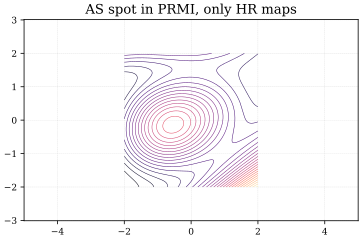

<Figure size 540x333.72 with 0 Axes>

In [84]:
fig = plt.figure()
fig = plt.contour(beamp_hrmap.x, beamp_hrmap.y, beamp_hrmap["beam"], 25, linewidths=0.5)
plt.axis("equal")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.title('AS spot in PRMI, only HR maps')

plt.show()
plt.savefig('AS_HR_map.png')